In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
brainFile = 'Datasets/brainsize.txt'

In [6]:
tx = []
with open(brainFile, 'r') as f:
    for i in f:
       tx.append(i.split())

In [7]:
del tx[-2:]

In [8]:
tx

[['Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count'],
 ['Female', '133', '132', '124', '118', '64.5', '816932'],
 ['Male', '140', '150', '124', 'NA', '72.5', '1001121'],
 ['Male', '139', '123', '150', '143', '73.3', '1038437'],
 ['Male', '133', '129', '128', '172', '68.8', '965353'],
 ['Female', '137', '132', '134', '147', '65.0', '951545'],
 ['Female', '99', '90', '110', '146', '69.0', '928799'],
 ['Female', '138', '136', '131', '138', '64.5', '991305'],
 ['Female', '92', '90', '98', '175', '66.0', '854258'],
 ['Male', '89', '93', '84', '134', '66.3', '904858'],
 ['Male', '133', '114', '147', '172', '68.8', '955466'],
 ['Female', '132', '129', '124', '118', '64.5', '833868'],
 ['Male', '141', '150', '128', '151', '70.0', '1079549'],
 ['Male', '135', '129', '124', '155', '69.0', '924059'],
 ['Female', '140', '120', '147', '155', '70.5', '856472'],
 ['Female', '96', '100', '90', '146', '66.0', '878897'],
 ['Female', '83', '71', '96', '135', '68.0', '865363'],
 ['Female', '

In [9]:
f.close()

In [7]:
brainFrame = pd.DataFrame(data=tx[1:], columns=tx[0])

In [8]:
brainFrame.head(10)

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118,64.5,816932
1,Male,140,150,124,NA,72.5,1001121
2,Male,139,123,150,143,73.3,1038437
3,Male,133,129,128,172,68.8,965353
4,Female,137,132,134,147,65.0,951545
5,Female,99,90,110,146,69.0,928799
6,Female,138,136,131,138,64.5,991305
7,Female,92,90,98,175,66.0,854258
8,Male,89,93,84,134,66.3,904858
9,Male,133,114,147,172,68.8,955466


In [9]:
brainFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     40 non-null     object
 1   FSIQ       40 non-null     object
 2   VIQ        40 non-null     object
 3   PIQ        40 non-null     object
 4   Weight     40 non-null     object
 5   Height     40 non-null     object
 6   MRI_Count  40 non-null     object
dtypes: object(7)
memory usage: 2.3+ KB


In [14]:
def toFloat(x):
    try:
        return float(x)
    except:
        return x

In [15]:
for i in brainFrame.columns:
    brainFrame[i] = brainFrame[i].apply(toFloat)
brainFrame.replace('NA', np.nan, inplace=True)
brainFrame = brainFrame.infer_objects()

In [16]:
menDf = brainFrame[brainFrame.Gender == 'Male']
womenDf = brainFrame[brainFrame.Gender == 'Female']

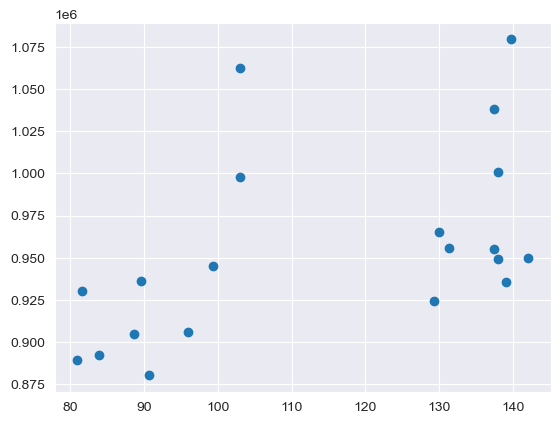

In [17]:
menMeanSmarts = menDf[['PIQ', 'FSIQ', 'VIQ']].mean(axis=1)
plt.scatter(menMeanSmarts, menDf['MRI_Count'])
plt.show()

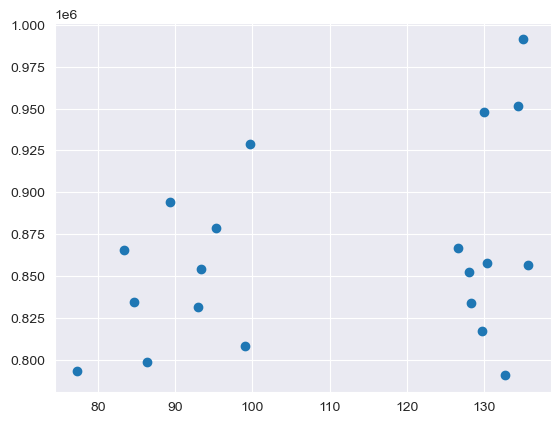

In [18]:
womenMeanSmarts = womenDf[['PIQ', 'FSIQ', 'VIQ']].mean(axis=1)
plt.scatter(womenMeanSmarts, womenDf['MRI_Count'])
plt.show()

In [19]:
brainFrame.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


In [20]:
menDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


In [21]:
womenDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


<AxesSubplot:>

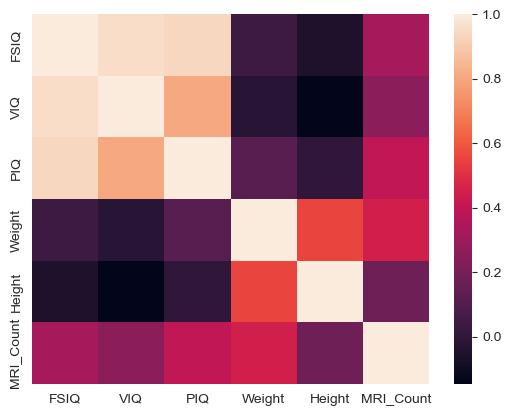

In [22]:
wcorr = womenDf.corr()
sns.heatmap(wcorr)